<h1>Recommender System with Python</h1>

---

<h2>Import Libraries</h2>

In [30]:
import numpy as np
import pandas as pd

<h2>Get The Data</h2>

In [2]:
#Create Column Names
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
# Reading File
df = pd.read_csv('u.data', sep = '\t', names= column_names)

In [3]:
#Reading data
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get the movie titles:

In [4]:
# Read Movie CSV file
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


we can merge both data set together:

In [5]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


<h2>Exploratory Data Analysis </h2>

Let's Explore the data a bit and get look at some of the best rated movies

<h2>Visualization Imports</h2>

In [6]:
#Whenever we want to do Exploratory Data Analysis MatplotLib and Seaborn are the library we should use

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') # To Give white background
%matplotlib inline

Let's Create a rating dataframe with average rating and number of rating

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now set Number of Ratings column:

In [11]:
ratings['No Of Rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,No Of Rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now a few histogram:

<AxesSubplot:>

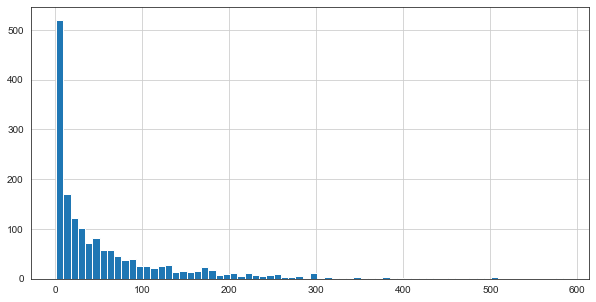

In [12]:
# Histogram with respect to number of rating
plt.figure(figsize=(10,5))
ratings['No Of Rating'].hist(bins=70)

<AxesSubplot:>

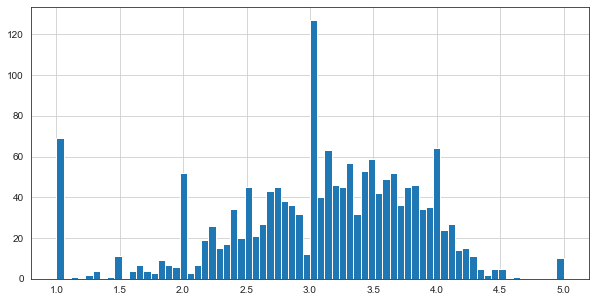

In [13]:
# Histogram with respect to rating
plt.figure(figsize=(10,5))
ratings['rating'].hist(bins=70)

Now Let's Create Joint Plot (Histogram + Scattered Plot)

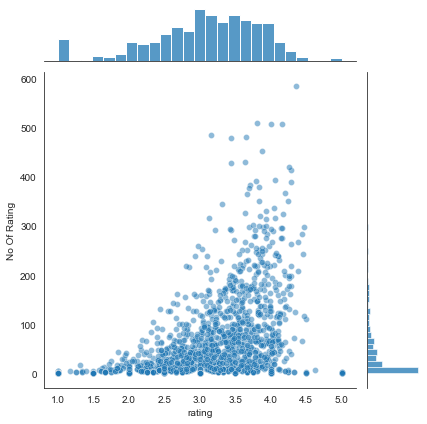

In [14]:
#Used Sea Born Library
sns.jointplot(x='rating', y ='No Of Rating', data = ratings, alpha =0.5)

Okay! Now that we have an idea how the data looks like, we will create simple recommendation system based on it

<h2>Recommending Similar Movies</h2>

Now Let's create a matrix that has the user ids on one access and movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note that there will be lot of NaN values because most of the people have not seen the movies

In [15]:
movieMat = df.pivot_table(index='user_id', columns='title', values='rating')
movieMat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Why we created the Pivot Table here, for example if I have watched 'Star wars' , so now which movie I should get recommendation, based on the userid and rating provided by them to other movie

Most rated movie:

In [16]:
ratings.sort_values('No Of Rating', ascending=False).head(10)

,rating,No Of Rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's Choose Star Wars - Sci- fiction Movie and <br>
Liar Liar - Comedy Movie

Now we wil find out correlation in the pivot table

In [17]:
ratings.head()

,rating,No Of Rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [18]:
starwars_user_rating = movieMat['Star Wars (1977)']
liarLiar_user_rating = movieMat['Liar Liar (1997)']
starwars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

based on above data we will co-relate it with my pivot table, for that will use method corrwith

In [19]:
similar_to_starwars = movieMat.corrwith(starwars_user_rating)
similar_to_liarliar = movieMat.corrwith(liarLiar_user_rating)

/Users/shivibhatt/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/shivibhatt/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using DataFrame instead of series:

In [25]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True) # Dropping NaN values
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Higer the correlation, that is the most recommended movie, because that movie is more related to star wars, max correlated value can be 1

Now, if we sort the dataframe by correlation, we should get the most similar movies, However, note that we get some results that really doesn't make sense. This is because, there is a lot of movies which is watched only once by users who also watched star wars(it was the most popular movie)


In [26]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's Fix this by Filtering out movies less than 100 reviews(this value was chosen based on histogram from earlier)

In [27]:
corr_starwars = corr_starwars.join(ratings['No Of Rating'])
corr_starwars.head()

,Correlation,No Of Rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice that how title makes a lot more sense

In [28]:
corr_starwars[corr_starwars['No Of Rating']>100].sort_values('Correlation', ascending=False).head()

,Correlation,No Of Rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now we will do same for Liar Liar

In [29]:
corr_liar_liar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liar_liar.dropna(inplace=True) # Dropping NaN values
corr_liar_liar = corr_liar_liar.join(ratings['No Of Rating'])
corr_liar_liar[corr_liar_liar['No Of Rating']>100].sort_values('Correlation', ascending=False).head()

,Correlation,No Of Rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
